<a href="https://colab.research.google.com/github/Rahulgarg95/deep_learning/blob/main/StocksClustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/shivamsarawagi/stock-data-sets-for-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: rahulgarg95
Your Kaggle Key: ··········


  0%|          | 0.00/42.5M [00:00<?, ?B/s]

100%|██████████| 42.5M/42.5M [00:00<00:00, 95.0MB/s]


In [ ]:
df=pd.read_csv('stock-data-sets-for-prediction/data_stocks.csv')

In [ ]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [ ]:
df.shape

(41266, 502)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X=df.values

In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

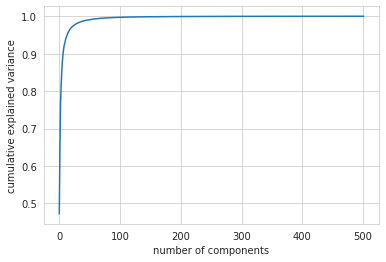

In [ ]:
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

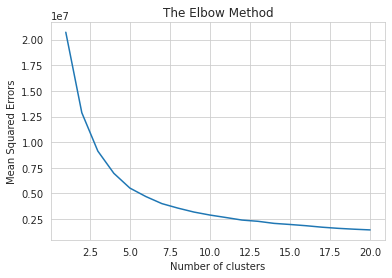

<Figure size 720x576 with 0 Axes>

In [ ]:
wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.figure(figsize=(10,8))
plt.show()

Seems like when no of clusters=5 the graph starts to dip further

In [ ]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_scaled)
y_kmeans = k_means.fit_predict(X_scaled)
labels = k_means.labels_

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
import numpy as np

In [ ]:
np.unique(labels)

print('No of Clusters Formed and labels: ',len(np.unique(labels)),np.unique(labels))

No of Clusters Formed and labels:  5 [0 1 2 3 4]


In [ ]:
y_kmeans[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
X_scaled[:50]

array([[-1.70648886, -1.46442566, -1.65013444, ..., -1.95578373,
         0.10281519, -2.04188417],
       [-1.70647316, -1.45203837, -1.64093012, ..., -1.98549977,
         0.06179505, -2.04188417],
       [-1.70645747, -1.4879413 , -1.65627065, ..., -1.98302344,
         0.04931066, -2.03740234],
       ...,
       [-1.70575106, -1.55670091, -1.70842849, ..., -1.99788146,
         0.05822808, -2.0807267 ],
       [-1.70573536, -1.55771464, -1.72223497, ..., -1.98797611,
         0.07606292, -2.08969036],
       [-1.70571966, -1.56049041, -1.72376902, ..., -1.97807076,
         0.06536202, -2.09641311]])

In [ ]:
labels[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
k_means.cluster_centers_

array([[ 0.62422718,  0.75632039,  1.22411556, ...,  0.56820024,
         1.19883358,  0.71589855],
       [-1.45078376, -1.61356013, -1.20201709, ..., -1.78873314,
        -0.07780742, -1.99417301],
       [ 1.35231698,  0.89780501, -0.10675508, ...,  0.99385398,
        -1.31667308,  0.33557219],
       [-0.85121962, -0.79235152, -0.77367056, ..., -0.73394298,
        -0.48403676, -0.34995279],
       [-0.14244704,  0.24465455,  0.45317278, ...,  0.41475655,
         0.59100159,  0.7366224 ]])

In [ ]:
X_scaled[y_kmeans==1,1]

array([-1.46442566, -1.45203837, -1.4879413 , ..., -0.86452662,
       -0.8592203 , -0.8592203 ])

In [ ]:
len(labels)

41266

In [ ]:
len(y_kmeans)

41266

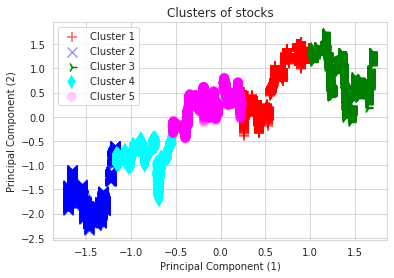

In [ ]:
#sns.scatterplot(X[y_kmeans==0,0], X[y_kmeans==0,1],alpha=0.2)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1',edgecolors='none',marker='+',alpha=0.6)
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2',edgecolors='none',marker='x',alpha=0.4)
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3',edgecolors='none',marker='4')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4',edgecolors='none',marker='d')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5',edgecolors='none',alpha=0.2)
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

In [ ]:
X

array([[1.49122620e+09, 2.36361010e+03, 4.23300000e+01, ...,
        6.38600000e+01, 1.22000000e+02, 5.33500000e+01],
       [1.49122626e+09, 2.36410010e+03, 4.23600000e+01, ...,
        6.37400000e+01, 1.21770000e+02, 5.33500000e+01],
       [1.49122632e+09, 2.36267990e+03, 4.23100000e+01, ...,
        6.37500000e+01, 1.21700000e+02, 5.33650000e+01],
       ...,
       [1.50420948e+09, 2.47003000e+03, 4.47400000e+01, ...,
        7.68800000e+01, 1.14310000e+02, 6.26850000e+01],
       [1.50420954e+09, 2.47149000e+03, 4.47100000e+01, ...,
        7.68300000e+01, 1.14230000e+02, 6.26301000e+01],
       [1.50420960e+09, 2.47149000e+03, 4.47400000e+01, ...,
        7.68100000e+01, 1.14280000e+02, 6.26800000e+01]])